<a href="https://colab.research.google.com/github/janithcyapa/SmartHVAC/blob/main/Fuzzy%20Logic%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Library
https://scikit-fuzzy.github.io/scikit-fuzzy/

In [1]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Tipping Problem

> Antecedents (inputs)
- Service: how would you rate the service? (0-10)
  - bad, decent, great
- Food: how would you rate the food? (0-10)
  - bad, decent, great

> Consequents (outputs)
- Tip: how much tip would you give? (0-20)
  - low, medium, high

> Rules
- If food quality is bad or service quality is bad then the tip will be Jow
- If service quality is decent then the tip will be medium
- If service quality is great and food quality is great then the tip will be high

In [ ]:
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
print(food)
print(food.universe)

Antecedent: food
[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
tip = ctrl.Consequent(np.arange(0,21,1),'tip')
print(tip)
print(tip.universe)

Consequent: tip
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


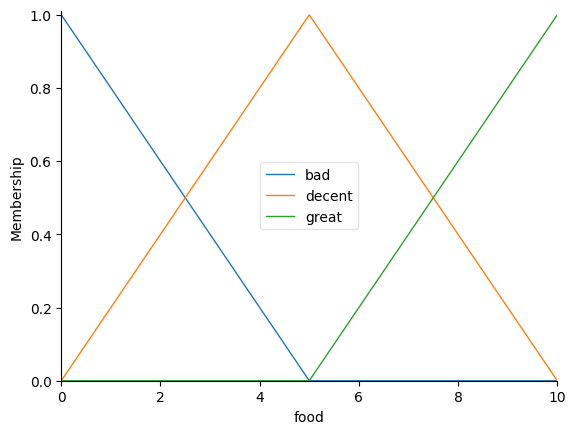

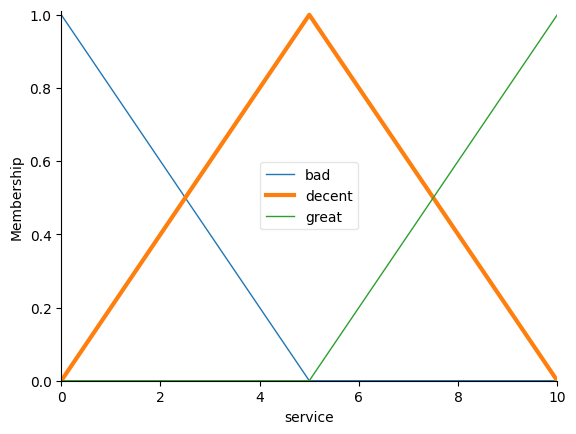

In [ ]:
food.automf(number=3,names=['bad', 'decent', 'great'])
service.automf(number=3,names=['bad', 'decent', 'great'])
food.view()
service['decent'].view()

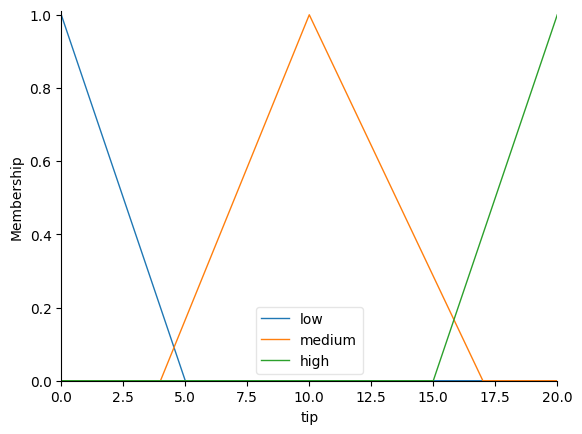

In [ ]:
tip['low']= fuzz.trimf(tip.universe,[0,0,5])
tip['medium']= fuzz.trimf(tip.universe,[4,10,17])
tip['high']= fuzz.trimf(tip.universe,[15,20,20])
tip.view()

In [ ]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(food['great'] | service['great'], tip['high'])
print(rule1)
print(rule2)
print(rule3)

IF food[bad] OR service[bad] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF service[decent] THEN tip[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF food[great] OR service[great] THEN tip[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [ ]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
control_system

In [ ]:
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system

12.932990814261254


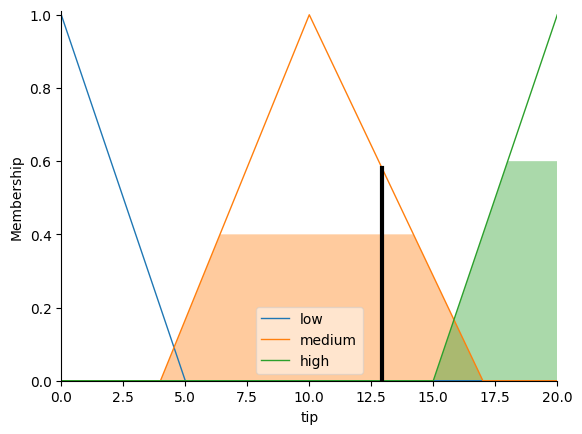

In [ ]:
fuzzy_system.input['food'] = 6
fuzzy_system.input['service'] = 8

fuzzy_system.compute()
print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)

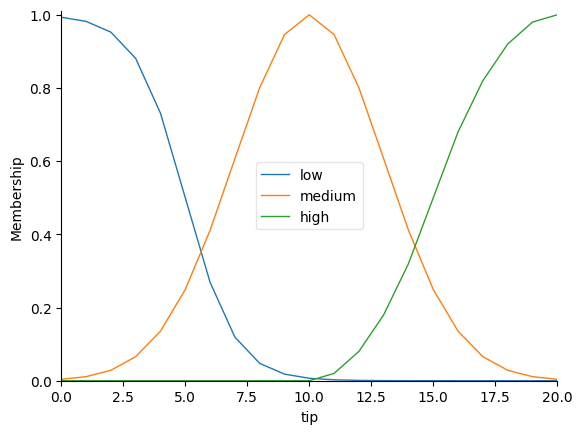

In [ ]:
tip['low']= fuzz.sigmf(tip.universe,5,-1)
tip['medium']= fuzz.gaussmf(tip.universe,10,3)
tip['high']= fuzz.pimf(tip.universe,10,20,20,21)
tip.view()

17.06666666666667


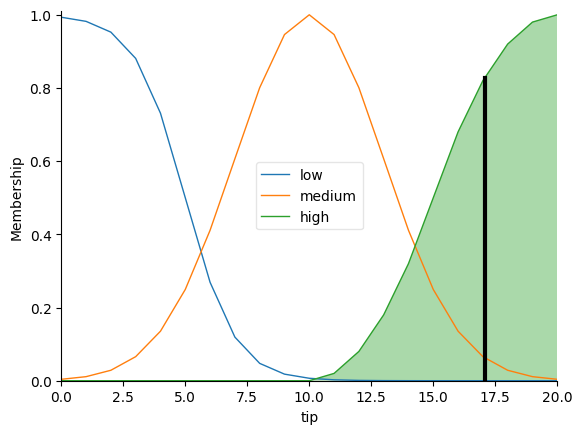

In [ ]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(food['great'] | service['great'], tip['high'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['food'] = 10
fuzzy_system.input['service'] = 10

fuzzy_system.compute()

print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)

# Vacuum Cleaner

> Antecedents (input)
- Surface: what is the difficult level of the surface? (0-5)
 - easy. moderate. hard
- Dirt: how much dirt? (0-5)
  - light. moderate. heavy

> Consequent (output)
- Suction: what suction level should the vacuum cleaner bet set to? (0-10)
  - low, medium. high

> Rules
- If surface is easy and dirt is light then suction will be low
- If surface is moderate and dirt is light then suction will be medium
- If surface is hard or dirt is heavy then suction will be high

5.865139949109414


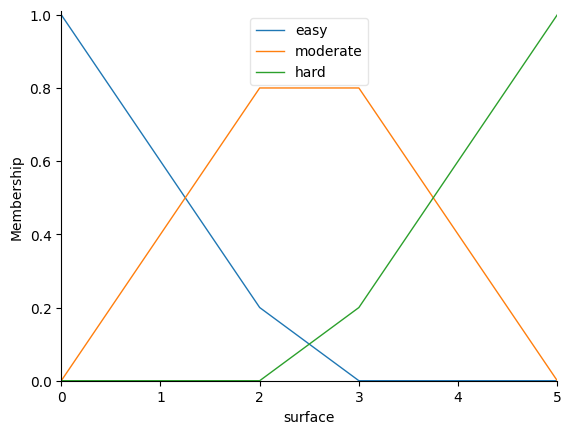

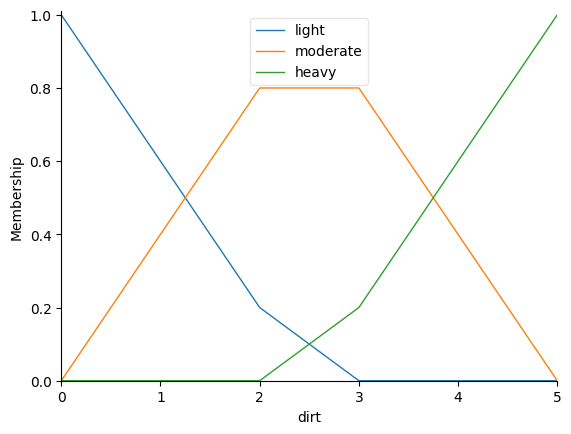

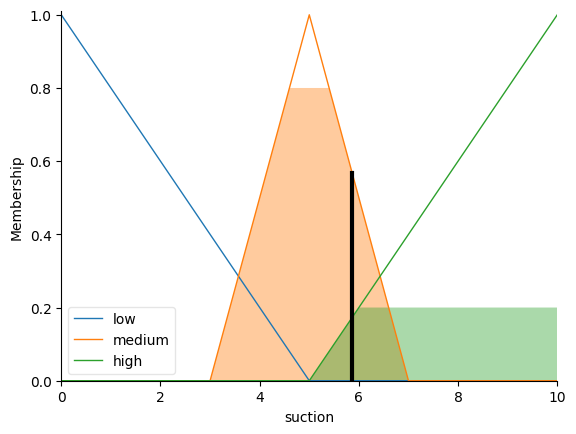

In [ ]:
# Antecedents
surface = ctrl.Antecedent(np.arange(0,6,1),'surface')
dirt = ctrl.Antecedent(np.arange(0,6,1),'dirt')
# Consequent
suction = ctrl.Consequent(np.arange(0,11,1),'suction')

# Membership Functions
surface.automf(number=3,names=['easy', 'moderate', 'hard'])
dirt.automf(number=3,names=['light', 'moderate', 'heavy'])

suction['low']= fuzz.trimf(suction.universe,[0,0,5])
suction['medium']= fuzz.trimf(suction.universe,[3,5,7])
suction['high']= fuzz.trimf(suction.universe,[5,10,10])

# Rules
rule1 = ctrl.Rule(surface['easy'] | dirt['light'], suction['low'])
rule2 = ctrl.Rule(surface['moderate'] | dirt['light'], suction['medium'])
rule3 = ctrl.Rule(surface['hard'] | dirt['heavy'], suction['high'])

# Control System
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)

# Inputs
fuzzy_system.input['surface'] = 3
fuzzy_system.input['dirt'] = 3

fuzzy_system.compute()

# Outputs
surface.view()
dirt.view()

print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)

# Tipping Problem - Hard

> Antecedents (inputs)
- Service: how would you rate the service? (0-10)
  - bad, decent, great
- Food: how would you rate the food? (0-10)
  - bad, decent, great

> Consequents (outputs)
- Tip: how much tip would you give? (0-20)
  - low, medium, high

> Rules
- If food quality is bad or service quality is bad then the tip will be Jow
- If service quality is decent then the tip will be medium
- If service quality is great and food quality is great then the tip will be high

In [ ]:
x_food = np.arange(0,11,1)
x_service = np.arange(0,11,1)
x_tip = np.arange(0,21,1)

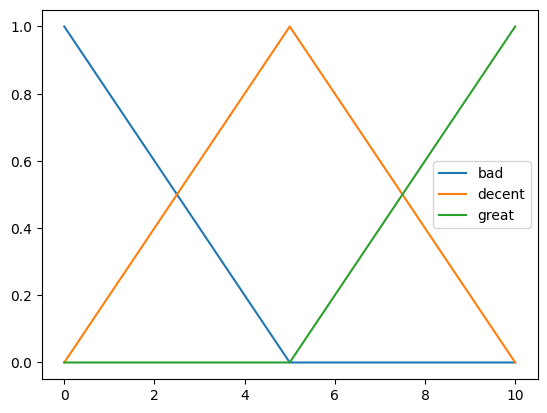

In [ ]:
y_food_bad = fuzz.trimf(x_food,[0,0,5])
y_food_decent = fuzz.trimf(x_food,[0,5,10])
y_food_great = fuzz.trimf(x_food,[5,10,10])
plt.plot(x_food,y_food_bad, label='bad')
plt.plot(x_food,y_food_decent, label='decent')
plt.plot(x_food,y_food_great, label='great')
plt.legend()

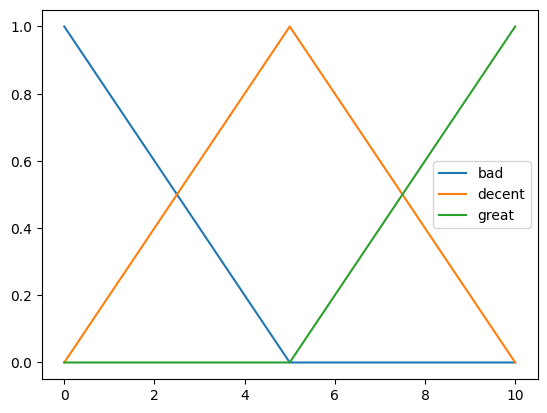

In [ ]:
y_service_bad = fuzz.trimf(x_service,[0,0,5])
y_service_decent = fuzz.trimf(x_service,[0,5,10])
y_service_great = fuzz.trimf(x_service,[5,10,10])
plt.plot(x_service,y_service_bad, label='bad')
plt.plot(x_service,y_service_decent, label='decent')
plt.plot(x_service,y_service_great, label='great')
plt.legend()

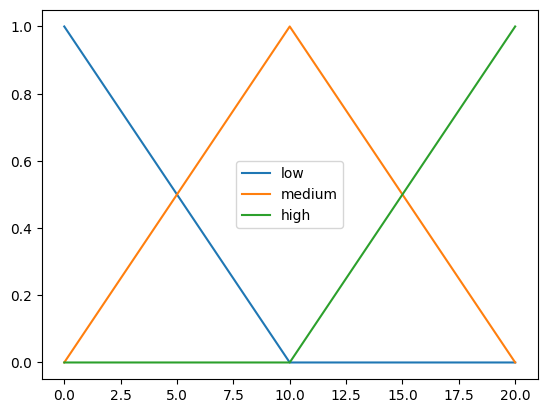

In [ ]:
y_tip_low = fuzz.trimf(x_tip,[0,0,10])
y_tip_medium = fuzz.trimf(x_tip,[0,10,20])
y_tip_high = fuzz.trimf(x_tip,[10,20,20])
plt.plot(x_tip,y_tip_low, label='low')
plt.plot(x_tip,y_tip_medium, label='medium')
plt.plot(x_tip,y_tip_high, label='high')
plt.legend()

In [ ]:
food_rate = 8.0
food_level_bad = fuzz.interp_membership(x_food, y_food_bad, food_rate)
food_level_decent = fuzz.interp_membership(x_food, y_food_decent, food_rate)
food_level_great = fuzz.interp_membership(x_food, y_food_great, food_rate)

food_level_bad,food_level_decent,food_level_great

(np.float64(0.0), np.float64(0.4), np.float64(0.6))

In [ ]:
service_rate = 6.5
service_level_bad = fuzz.interp_membership(x_service, y_service_bad, service_rate)
service_level_decent = fuzz.interp_membership(x_service, y_service_decent, service_rate)
service_level_great = fuzz.interp_membership(x_service, y_service_great, service_rate)

print(service_level_bad,service_level_decent,service_level_great)

0.0 0.7 0.30000000000000004


In [ ]:
activation_rule1 = np.fmax(food_level_bad, service_level_bad)
activation_rule2 = np.fmax(service_level_decent, 0)
activation_rule3 = np.fmax(food_level_great, service_level_great)
print(activation_rule1,activation_rule2,activation_rule3)

0.0 0.7 0.6


In [ ]:
activation_tip_low = np.fmin(activation_rule1, y_tip_low)
activation_tip_medium = np.fmin(activation_rule2, y_tip_medium)
activation_tip_high = np.fmin(activation_rule3, y_tip_high)
print(activation_tip_low)
print(activation_tip_medium)
print(activation_tip_high)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.6 0.5 0.4 0.3
 0.2 0.1 0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.6
 0.6 0.6 0.6]


In [ ]:
control = np.fmax(activation_tip_low, np.fmax(activation_tip_medium, activation_tip_high))
print(control)

tip = fuzz.defuzz(x_tip, control, 'lom')
# tip = fuzz.defuzz(x_tip, control, 'som')
# tip = fuzz.defuzz(x_tip, control, 'mom')
# tip = fuzz.defuzz(x_tip, control, 'bisector')
# tip = fuzz.defuzz(x_tip, control, 'centroid')
print(tip)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.6 0.5 0.6 0.6
 0.6 0.6 0.6]
13


In [ ]:
tip_activation = fuzz.interp_membership(x_tip, control, tip)
print(tip_activation)

0.7


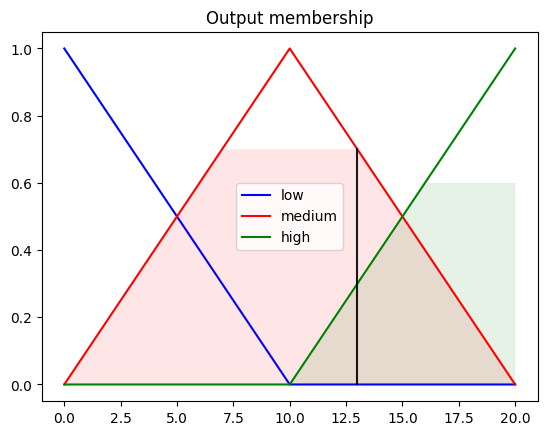

In [ ]:
x_tip0 =np.zeros_like(x_tip)
plt.plot(x_tip,y_tip_low,'b', label='low')
plt.plot(x_tip,y_tip_medium, 'r',label='medium')
plt.plot(x_tip,y_tip_high,'g', label='high')
plt.fill_between(x_tip, x_tip0, activation_tip_low, facecolor='b', alpha=0.1)
plt.fill_between(x_tip, x_tip0, activation_tip_medium, facecolor='r', alpha=0.1)
plt.fill_between(x_tip, x_tip0, activation_tip_high, facecolor='g', alpha=0.1)
plt.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
plt.title('Output membership')
plt.legend()

# Inverted Pendulum on a Moving cart

In [2]:
# Install fuzzy logic library
!pip install -q scikit-fuzzy
!pip install -q matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


In [3]:
# Import required libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from IPython.display import HTML

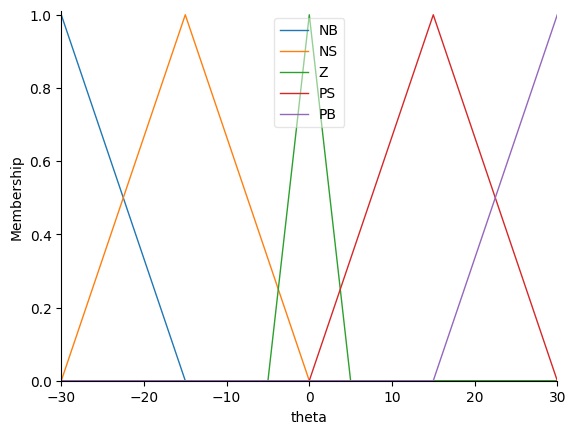

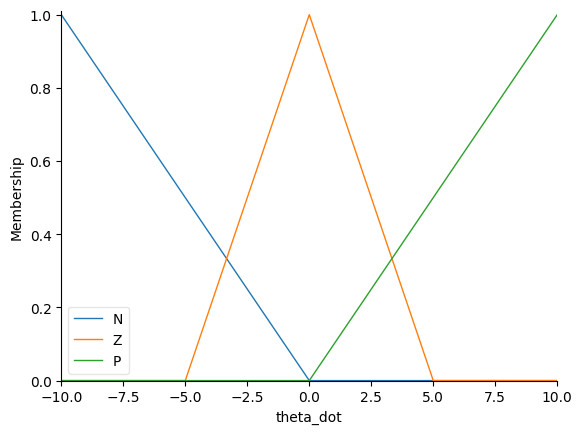

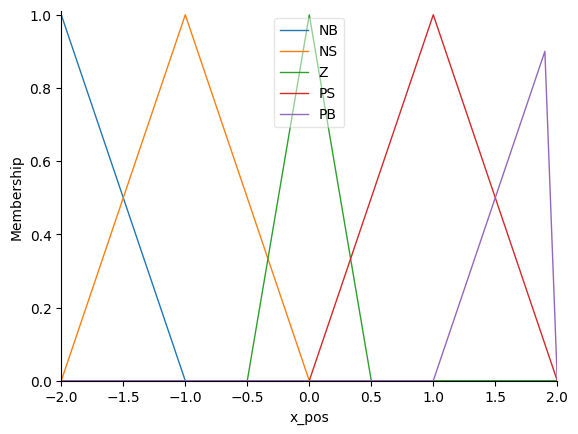

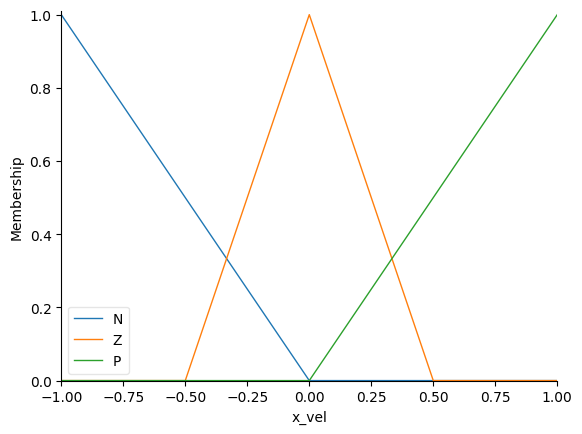

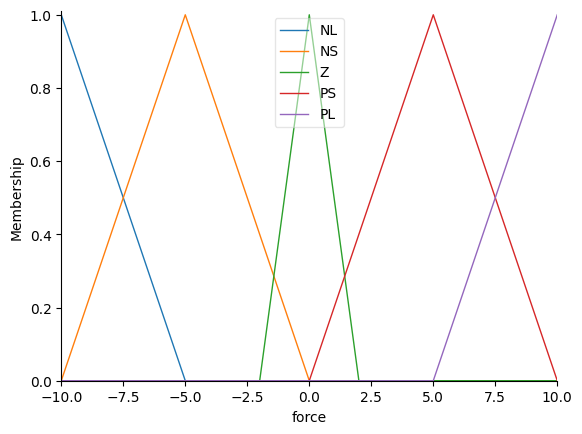

In [4]:
# Create fuzzy variables
theta = ctrl.Antecedent(np.arange(-30, 31, 1), 'theta')  # Pendulum angle
theta_dot = ctrl.Antecedent(np.arange(-10, 11, 1), 'theta_dot')  # Angular velocity
x_pos = ctrl.Antecedent(np.arange(-2, 2.1, 0.1), 'x_pos')  # Cart position
x_vel = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'x_vel')  # Cart velocity
force = ctrl.Consequent(np.arange(-10, 11, 1), 'force')  # Control force

# Membership functions for theta (pendulum angle)
theta['NB'] = fuzz.trimf(theta.universe, [-30, -30, -15])  # Negative Big
theta['NS'] = fuzz.trimf(theta.universe, [-30, -15, 0])  # Negative Small
theta['Z'] = fuzz.trimf(theta.universe, [-5, 0, 5])  # Zero
theta['PS'] = fuzz.trimf(theta.universe, [0, 15, 30])  # Positive Small
theta['PB'] = fuzz.trimf(theta.universe, [15, 30, 30])  # Positive Big

# Membership functions for theta_dot (angular velocity)
theta_dot['N'] = fuzz.trimf(theta_dot.universe, [-10, -10, 0])  # Negative
theta_dot['Z'] = fuzz.trimf(theta_dot.universe, [-5, 0, 5])  # Zero
theta_dot['P'] = fuzz.trimf(theta_dot.universe, [0, 10, 10])  # Positive

# Membership functions for x_pos (cart position)
x_pos['NB'] = fuzz.trimf(x_pos.universe, [-2, -2, -1])  # Negative Big
x_pos['NS'] = fuzz.trimf(x_pos.universe, [-2, -1, 0])  # Negative Small
x_pos['Z'] = fuzz.trimf(x_pos.universe, [-0.5, 0, 0.5])  # Zero
x_pos['PS'] = fuzz.trimf(x_pos.universe, [0, 1, 2])  # Positive Small
x_pos['PB'] = fuzz.trimf(x_pos.universe, [1, 2, 2])  # Positive Big

# Membership functions for x_vel (cart velocity)
x_vel['N'] = fuzz.trimf(x_vel.universe, [-1, -1, 0])  # Negative
x_vel['Z'] = fuzz.trimf(x_vel.universe, [-0.5, 0, 0.5])  # Zero
x_vel['P'] = fuzz.trimf(x_vel.universe, [0, 1, 1])  # Positive

# Membership functions for force
force['NL'] = fuzz.trimf(force.universe, [-10, -10, -5])  # Negative Large
force['NS'] = fuzz.trimf(force.universe, [-10, -5, 0])  # Negative Small
force['Z'] = fuzz.trimf(force.universe, [-2, 0, 2])  # Zero
force['PS'] = fuzz.trimf(force.universe, [0, 5, 10])  # Positive Small
force['PL'] = fuzz.trimf(force.universe, [5, 10, 10])  # Positive Large

# view membership fucntion
theta.view()
theta_dot.view()
x_pos.view()
x_vel.view()
force.view()

In [9]:
rules = [
    # 1. Emergency rules - when pendulum is falling (priority 1)
    ctrl.Rule(theta['NB'] & theta_dot['N'], force['PL']),  # Large angle falling fast
    ctrl.Rule(theta['NB'] & theta_dot['Z'], force['PL']),  # Large angle no velocity
    ctrl.Rule(theta['NB'] & theta_dot['P'], force['PS']),  # Large angle recovering

    ctrl.Rule(theta['PB'] & theta_dot['P'], force['NL']),  # Large angle falling fast
    ctrl.Rule(theta['PB'] & theta_dot['Z'], force['NL']),  # Large angle no velocity
    ctrl.Rule(theta['PB'] & theta_dot['N'], force['NS']),  # Large angle recovering

    # 2. Correction rules - when pendulum is moderately off-balance (priority 2)
    ctrl.Rule(theta['NS'] & theta_dot['N'], force['PL']),  # Medium angle falling
    ctrl.Rule(theta['NS'] & theta_dot['Z'], force['PS']),  # Medium angle stable
    ctrl.Rule(theta['NS'] & theta_dot['P'], force['Z']),   # Medium angle recovering

    ctrl.Rule(theta['PS'] & theta_dot['P'], force['NL']),  # Medium angle falling
    ctrl.Rule(theta['PS'] & theta_dot['Z'], force['NS']),  # Medium angle stable
    ctrl.Rule(theta['PS'] & theta_dot['N'], force['Z']),   # Medium angle recovering

    # 3. Fine-tuning rules - when pendulum is nearly balanced (priority 3)
    ctrl.Rule(theta['Z'] & theta_dot['N'], force['PS']),   # Small angle falling
    ctrl.Rule(theta['Z'] & theta_dot['P'], force['NS']),   # Small angle falling
    ctrl.Rule(theta['Z'] & theta_dot['Z'], force['Z']),    # Balanced

    # 4. Cart centering rules (only when pendulum is balanced) (priority 4)
    # Far from center cases
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['NB'] & x_vel['N'], force['PL']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['NB'] & x_vel['Z'], force['PL']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['NB'] & x_vel['P'], force['PS']),

    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['PB'] & x_vel['P'], force['NL']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['PB'] & x_vel['Z'], force['NL']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['PB'] & x_vel['N'], force['NS']),

    # Near center cases
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['NS'] & x_vel['N'], force['PS']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['NS'] & x_vel['Z'], force['PS']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['NS'] & x_vel['P'], force['Z']),

    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['PS'] & x_vel['P'], force['NS']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['PS'] & x_vel['Z'], force['NS']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['PS'] & x_vel['N'], force['Z']),

    # At center cases
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['Z'] & x_vel['N'], force['PS']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['Z'] & x_vel['P'], force['NS']),
    ctrl.Rule(theta['Z'] & theta_dot['Z'] & x_pos['Z'] & x_vel['Z'], force['Z']),
]

In [10]:
# Create control system
pendulum_ctrl = ctrl.ControlSystem(rules)
pendulum_sim = ctrl.ControlSystemSimulation(pendulum_ctrl)

# Pendulum simulation constants
dt = 0.01
g = 9.81
l = 0.5  # pendulum length
m = 0.15  # pendulum mass
M = 1.0  # cart mass
cart_width = 0.4
cart_height = 0.2

# Initial conditions
theta_val = 10.0  # initial angle (degrees)
theta_dot_val = 0.0  # initial angular velocity
x_val = 0.5  # initial cart position (off-center to test centering)
x_dot_val = 0.0  # initial cart velocity

# Store simulation data
theta_history = []
theta_dot_history = []
force_history = []
x_history = []
x_vel_history = []
time_history = []


In [12]:
# Simulation loop
for t in np.arange(0, 20, dt):  # Longer simulation to observe centering
    # Compute control force using fuzzy logic
    pendulum_sim.input['theta'] = theta_val
    pendulum_sim.input['theta_dot'] = theta_dot_val
    pendulum_sim.input['x_pos'] = x_val
    pendulum_sim.input['x_vel'] = x_dot_val
    pendulum_sim.compute()
    F = pendulum_sim.output['force']

    # Update pendulum dynamics
    theta_ddot = (g * np.sin(np.radians(theta_val)) - F * np.cos(np.radians(theta_val))/l)
    theta_dot_val += theta_ddot * dt
    theta_val += theta_dot_val * dt

    # Update cart dynamics
    x_ddot = (F + m * l * theta_ddot * np.cos(np.radians(theta_val)) / (M + m))
    x_dot_val += x_ddot * dt
    x_val += x_dot_val * dt

    # Store data
    theta_history.append(theta_val)
    theta_dot_history.append(theta_dot_val)
    force_history.append(F)
    x_history.append(x_val)
    x_vel_history.append(x_dot_val)
    time_history.append(t)

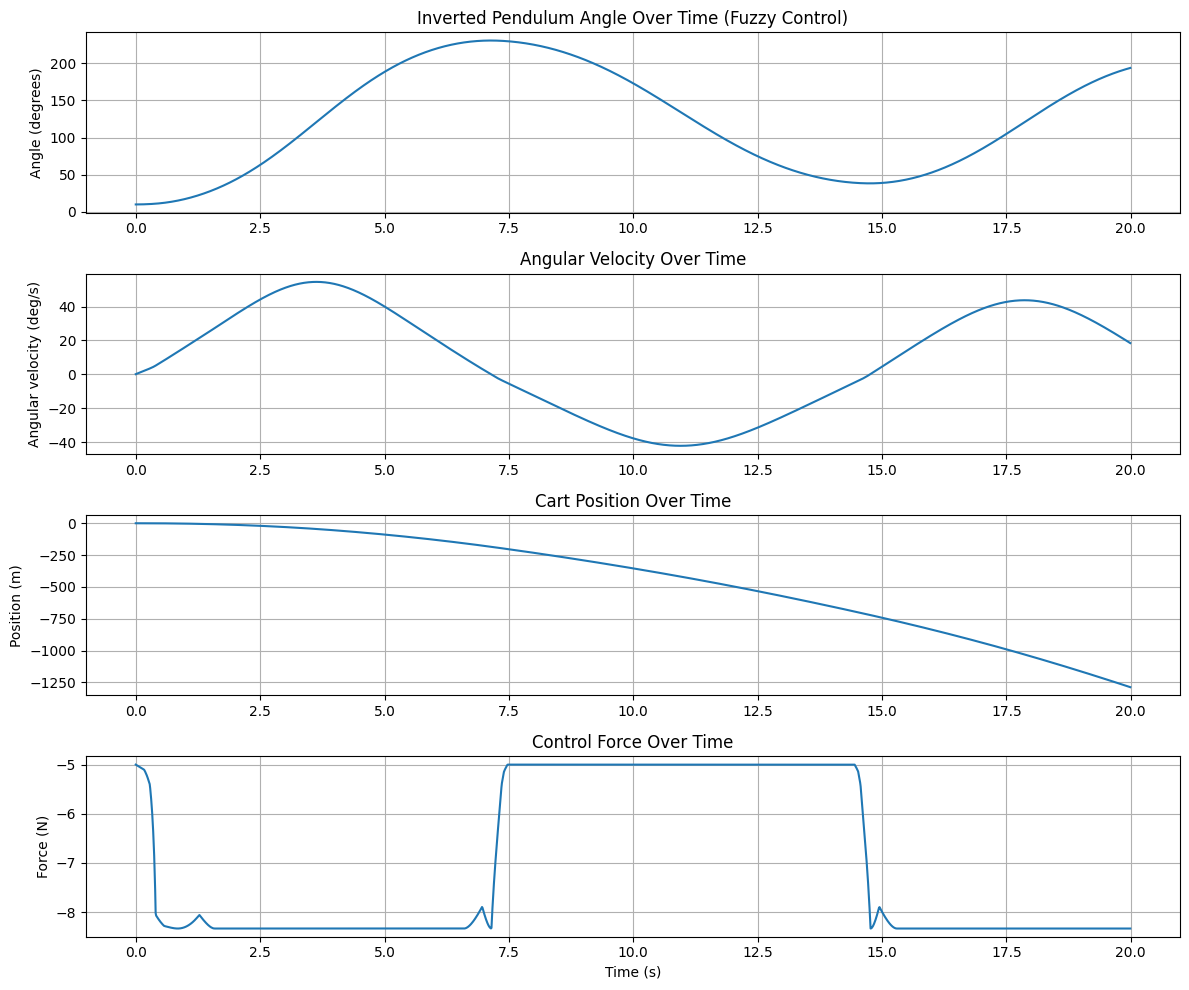

In [13]:

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(time_history, theta_history)
plt.title("Inverted Pendulum Angle Over Time (Fuzzy Control)")
plt.ylabel("Angle (degrees)")
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(time_history, theta_dot_history)
plt.title("Angular Velocity Over Time")
plt.ylabel("Angular velocity (deg/s)")
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(time_history, x_history)
plt.title("Cart Position Over Time")
plt.ylabel("Position (m)")
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(time_history, force_history)
plt.title("Control Force Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
ax.grid(True)

# Create cart and pendulum elements
cart = Rectangle((x_history[0] - cart_width/2, -cart_height/2),
                 cart_width, cart_height, fc='blue', ec='black')
ax.add_patch(cart)

pendulum, = ax.plot([x_history[0], x_history[0] + l * np.sin(np.radians(theta_history[0]))],
                    [0, l * np.cos(np.radians(theta_history[0]))], 'r-', lw=3)

# Add center line
ax.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Add info text
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
angle_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
pos_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)
force_text = ax.text(0.02, 0.80, '', transform=ax.transAxes)

def init():
    cart.set_xy((x_history[0] - cart_width/2, -cart_height/2))
    pendulum.set_data([x_history[0], x_history[0] + l * np.sin(np.radians(theta_history[0]))],
                     [0, l * np.cos(np.radians(theta_history[0]))])
    time_text.set_text(f'Time: {time_history[0]:.2f}s')
    angle_text.set_text(f'Angle: {theta_history[0]:.2f}°')
    pos_text.set_text(f'Position: {x_history[0]:.2f}m')
    force_text.set_text(f'Force: {force_history[0]:.2f}N')
    return cart, pendulum, time_text, angle_text, pos_text, force_text

def animate(i):
    if i % 5 != 0:
        return cart, pendulum, time_text, angle_text, pos_text, force_text

    cart.set_xy((x_history[i] - cart_width/2, -cart_height/2))
    pendulum.set_data([x_history[i], x_history[i] + l * np.sin(np.radians(theta_history[i]))],
                     [0, l * np.cos(np.radians(theta_history[i]))])
    time_text.set_text(f'Time: {time_history[i]:.2f}s')
    angle_text.set_text(f'Angle: {theta_history[i]:.2f}°')
    pos_text.set_text(f'Position: {x_history[i]:.2f}m')
    force_text.set_text(f'Force: {force_history[i]:.2f}N')
    return cart, pendulum, time_text, angle_text, pos_text, force_text

# Create animation
ani = FuncAnimation(fig, animate, frames=range(0, len(time_history), 5),
                    init_func=init, blit=True, interval=50, repeat=False)

# Display in notebook
plt.close()
HTML(ani.to_html5_video())